# Icing: An Observational Study 🥶


## Load & Clean

In [16]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import mysql.connector
import itertools
import dtale
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
from datetime import datetime as dt
from util.data import clean, get_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
cnx = mysql.connector.connect(user='root', password='mOntie20!mysql', host='127.0.0.1', database='nfl')
df = get_data(cnx, 'g.seas<=2019', xp=False, base='raw_6_cat')
df = clean(df, dropna=False)
df

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
2166,AD-0800,1,38,2000,17,73,BUF,Ralph Wilson Stadium,TEN,0,...,1,10,1,0,0,1,0,1,0.764708,765
2185,AD-0800,1,27,2000,17,73,BUF,Ralph Wilson Stadium,TEN,0,...,1,10,1,0,0,1,0,1,0.807721,766
4565,AD-0800,1,36,2000,17,80,TEN,Adelphia Coliseum,TEN,0,...,1,13,0,0,1,0,0,5,NaN,767
8564,AD-0800,1,24,2000,17,61,PIT,Three Rivers Stadium,TEN,0,...,0,16,1,0,0,1,1,1,0.842837,768
8628,AD-0800,1,40,2000,17,61,PIT,Three Rivers Stadium,TEN,0,...,0,16,1,0,0,1,1,1,0.871516,769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862982,ZG-0050,1,30,2019,3,66,ARI,State Farm Stadium,ARI,0,...,0,0,0,0,0,0,0,1,0.826709,62
865338,ZG-0050,1,21,2019,3,66,ARI,State Farm Stadium,ARI,0,...,0,11,0,0,0,0,0,2,0.858217,63
868268,ZG-0050,1,22,2019,3,43,SEA,CenturyLink Field,ARI,0,...,1,7,1,0,0,1,0,1,1.000000,64


## Explore

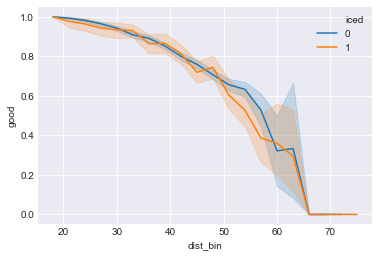

In [18]:
df_ = df.copy()
df_['dist_bin'] = 3*round(df_['dist']/3)
sns.lineplot(x='dist_bin', y='good', hue='iced', data=df_)

## Matching

* Mahanalobis distance with radius matching

In [19]:
df = df[df['dist']>=45].drop(['fkicker', 'home_team', 'stadium', 'team', 'XP', 'humid'], axis=1)
df.dropna(inplace=True)
print(df['iced'].value_counts())
df

0    4220
1     817
Name: iced, dtype: int64


,good,dist,year,seasons,temperature,age,altitude,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,
11064,0,46,2000,17,72,38,0,1,5,0,0,1,0,0,1,1.000000,771
20774,1,46,2000,17,54,38,0,0,9,1,0,0,0,0,1,0.710344,779
32219,1,50,2000,17,30,38,0,0,7,1,0,1,1,0,6,0.961555,795
479437,0,63,2011,1,61,24,0,0,0,1,0,0,1,0,1,0.605990,2
495847,1,47,2011,1,51,24,0,1,2,0,0,0,0,0,1,0.725456,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838716,0,48,2019,3,66,24,0,0,0,0,0,0,0,0,1,0.835520,44
844674,1,47,2019,3,56,24,0,1,3,1,0,0,1,1,1,0.813096,52
846996,1,50,2019,3,70,24,0,0,0,1,0,0,1,0,1,0.771461,56


In [20]:
from util.matching import mahalanobis_frontier, match_by_distance
df['iced'] = df['iced'].astype(bool)
df_mf = mahalanobis_frontier(df.drop('good', axis=1), 'iced')
df_mf

129 distances to check.
Checked 1/129 distances
Checked 11/129 distances
Checked 21/129 distances
Checked 31/129 distances
Checked 41/129 distances
Checked 51/129 distances
Checked 61/129 distances
Checked 71/129 distances
Checked 81/129 distances
Checked 91/129 distances
Checked 101/129 distances
Checked 111/129 distances
Checked 121/129 distances


,pruned controls,pruned treatments,AMD,radius
0,0,0,1.832563,13.0
1,0,0,1.832563,12.7
2,0,0,1.832563,12.6
3,0,0,1.832563,12.5
4,0,0,1.832563,12.4
...,...,...,...,...
124,4187,787,0.258360,0.4
125,4203,801,0.180068,0.3
126,4212,809,0.080724,0.2
127,4214,811,0.064062,0.1


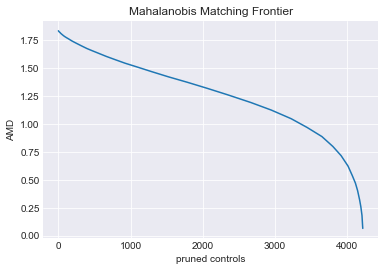

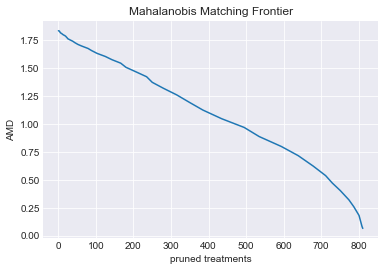

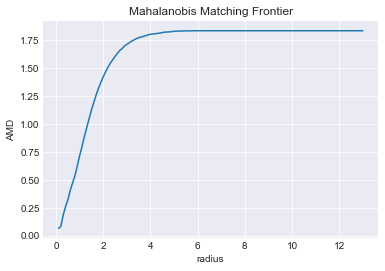

In [21]:
sns.lineplot(x='pruned controls', y='AMD', data=df_mf)
plt.title('Mahalanobis Matching Frontier')
plt.show()
plt.title('Mahalanobis Matching Frontier')
sns.lineplot(x='pruned treatments', y='AMD', data=df_mf)
plt.show()
plt.title('Mahalanobis Matching Frontier')
sns.lineplot(x='radius', y='AMD', data=df_mf)

The frontier is relatively linear, so there's no obvious choice of radius. We have a lot of iced examples to spare, so we'll choose a relatively tight radius of 1. This results in pruning about 90% of the controls, but we still have about 300 left.

In [60]:
df_matched = match_by_distance(df, 'iced', 'good', 'mahalanobis', 1)

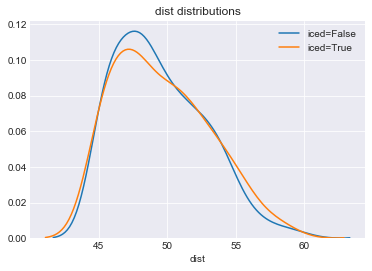

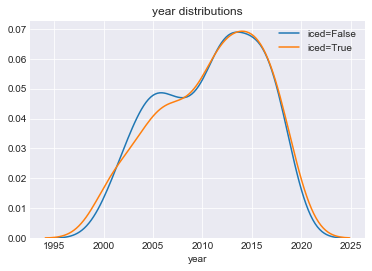

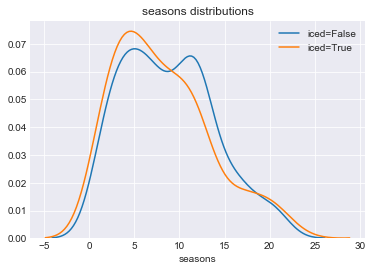

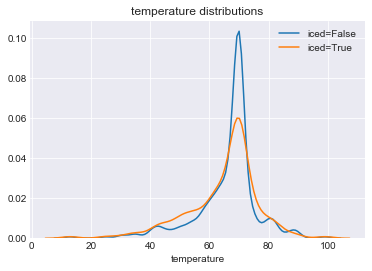

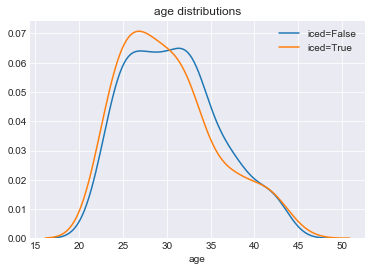

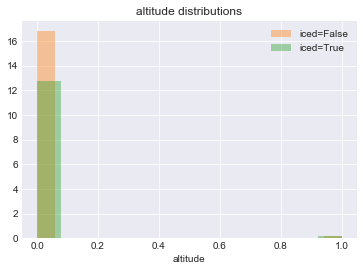

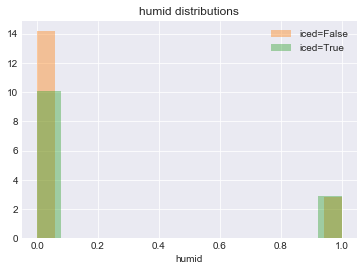

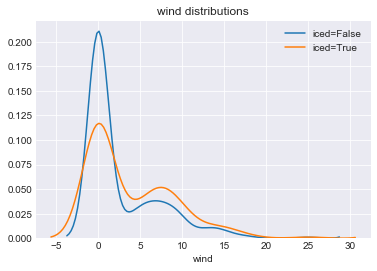

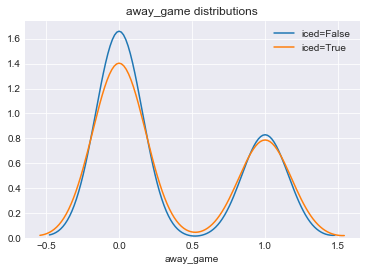

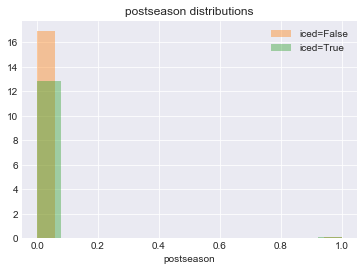

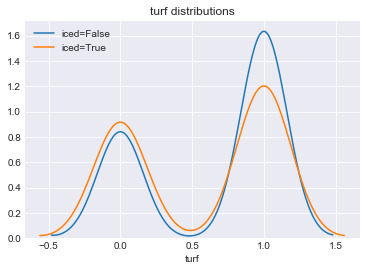

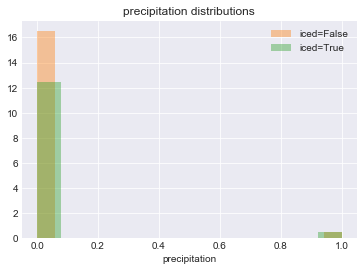

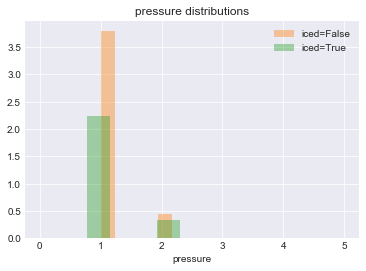

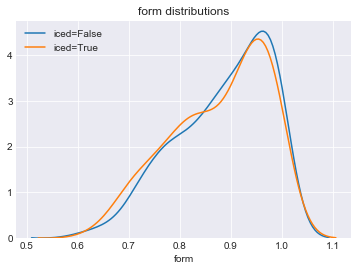

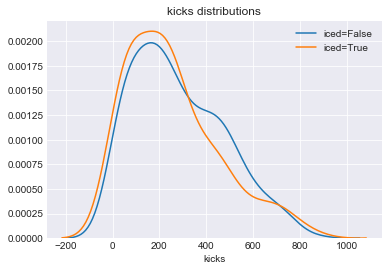

In [61]:
from util.matching import covariate_dists
covariate_dists(df_matched.drop('good', axis=1), on='iced')

In [62]:
df_ice = df_matched.loc[df_matched['iced']==1, :]
df_noice = df_matched.loc[df_matched['iced']==0, :]
print(len(df_ice), 'iced samples.', len(df_noice), 'not-iced samples.')

178 iced samples. 306 not-iced samples.


## Model

We work within a Bayesian framework, setting a prior distribution on the true population proportion and update the prior after our observations. The Beta-Binomial conjugacy makes this process relatively pain-free.

In [63]:
from scipy.stats import beta
p_hat = df['good'].mean()
alpha_ = 10
beta_ = int(round(alpha_*(1-p_hat)/p_hat))
print(f'alpha: {alpha_}, beta: {beta_}')

alpha: 10, beta: 5


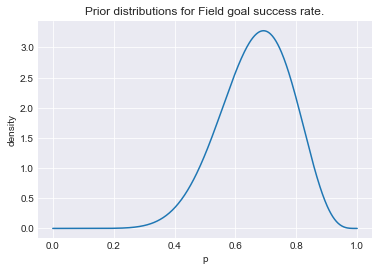

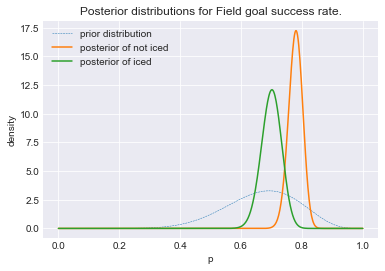

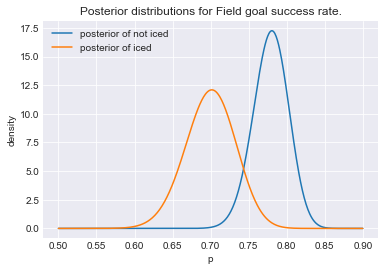

In [64]:
from util.bayes import BetaBinomial

control = BetaBinomial(alpha_, beta_, 'not iced')
treatment = BetaBinomial(alpha_, beta_, 'iced')
control.plot_prior(show=True)
plt.cla()

control.observe(df_noice['good'])
treatment.observe(df_ice['good'])

control.plot_posterior(prior=True)
treatment.plot_posterior(show=True, prior=False)

# zoom in
x = np.linspace(0.5,0.9,500)
control.plot_posterior(x, prior=False, show=False)
treatment.plot_posterior(x, prior=False, show=True)

samples = 20000
samples_posterior_noice = control.sample(samples)
samples_posterior_ice = treatment.sample(samples)

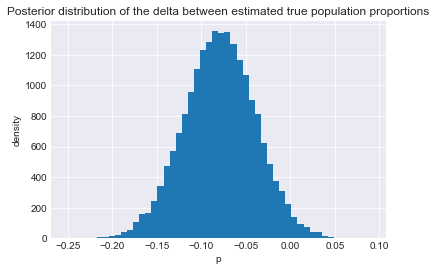

97 % likely that iced has a lower true population proportion of converted field goals.
-0.08 is the median difference, with 50% credible interval of (0.0,-0.16).


In [65]:
posterior_diff = samples_posterior_ice - samples_posterior_noice

plt.hist(posterior_diff, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of the delta between estimated true population proportions')
plt.show()
print(int((samples_posterior_ice<samples_posterior_noice).mean()*100), r'% likely that iced has a lower true population proportion of converted field goals.')

from scipy.stats import bayes_mvs
alpha = 0.5
center, _, _ = bayes_mvs(posterior_diff, alpha=alpha)
print(f'{round(center.statistic,2)} is the median difference, with {int(alpha*100)}% credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')

96 % likely relative lift less than -1%.
-0.1 is the median relative lift, with 50 credible interval of (0.0,-0.2).


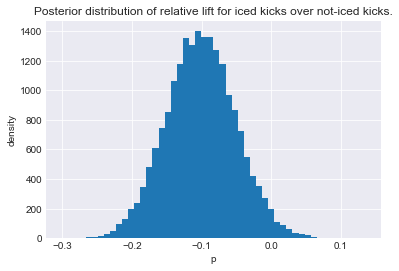

In [66]:
posterior_relative = (samples_posterior_ice-samples_posterior_noice)/samples_posterior_noice
plt.hist(posterior_relative, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of relative lift for iced kicks over not-iced kicks.')
print(int((posterior_relative<-0.01).mean()*100), r'% likely relative lift less than -1%.')

center, _, _ = bayes_mvs(posterior_relative, alpha=alpha)
print(f'{round(center.statistic,2)} is the median relative lift, with {int(alpha*100)} credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')